# Titanic Survival Prediction Project

## 4. Modeling
We train a Random Forest classifier to predict survival and evaluate its performance.

In [145]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from ipywidgets import interact, IntSlider, Dropdown
from IPython.display import display
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

1. We first load our test and training data 

In [114]:
test_data = pd.read_csv("./test.csv")
train_data = pd.read_csv("./train.csv")

2. We can use the preprocessing function we created earlier to clean and process our data

In [115]:
def titanic_preprocess(df):
    # 1. Fill missing Age with median age
    median_age = df['Age'].median()
    df['Age'].fillna(median_age, inplace=True)
    
    # 2. Fill missing Embarked with mode (most common)
    mode_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(mode_embarked, inplace=True)
    
    # 3. Drop Cabin column since it has too many missing values
    if 'Cabin' in df.columns:
        df.drop('Cabin', axis=1, inplace=True)
    
    # 4. Drop any remaining missing values
    df.dropna(inplace=True)
    
    # 5. Convert Sex to numbers: male=0, female=1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # 5. Convert Embarked to numbers: C=0, Q=1, S=2
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    
    # 6. Create combined Sex_Pclass feature (e.g. '1_0' means female 1st class)
    df['Sex_Pclass'] = df['Sex'].astype(str) + '_' + df['Pclass'].astype(str)

    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

    return df


In [116]:
clean_test = titanic_preprocess(test_data)
clean_train = titanic_preprocess(train_data)

In [117]:
clean_train.head()
clean_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Pclass
0,892,3,0,34.5,0,0,7.8292,1,0_3
1,893,3,1,47.0,1,0,7.0000,2,1_3
2,894,2,0,62.0,0,0,9.6875,1,0_2
3,895,3,0,27.0,0,0,8.6625,2,0_3
4,896,3,1,22.0,1,1,12.2875,2,1_3


In [118]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    int64  
 8   Sex_Pclass   417 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 32.6+ KB


3. We then select the features we want to use to train our model. Which is every column in our clean_train dataset except our "Survived" column since it is what we are training our model to predict

In [119]:
#Features

X = clean_train.drop('Survived', axis=1)
y = clean_train['Survived']

4. We then build our model with RandomForest and then fit it

In [120]:
#model

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

5. We then use our model to predict if a passenger in the "clean_test" dataset survived or not

In [121]:
X_test = clean_test[X.columns]

In [122]:
test_predictions = model.predict(X_test)

In [123]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Pclass
0,892,3,0,34.5,0,0,7.8292,1,0_3
1,893,3,1,47.0,1,0,7.0000,2,1_3
2,894,2,0,62.0,0,0,9.6875,1,0_2
3,895,3,0,27.0,0,0,8.6625,2,0_3
4,896,3,1,22.0,1,1,12.2875,2,1_3


We then created a model_prediction file which has the prediction for each passenger. It contains the passengerId and the prediction for the passenger. i.e if he or she survived or not.
We have 1 for survived and 0 for did not survive

In [124]:
model_prediction = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})


In [125]:
model_prediction.to_csv('model_prediction.csv', index=False)


Evaluating the accuracy of our model using the accuracy score and confusion matrix.
Our model shows good performance, with an accuracy of 82.7%
Our confusion matrix produced the following:
- True Negatives (92): 92 passengers who didn’t survive were correctly predicted.

- False Positives (13): 13 passengers were predicted to survive but didn’t.

- False Negatives (18): 18 passengers were predicted not to survive but did.

- True Positives (56): 56 passengers who survived were correctly predicted.-

In [126]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8268156424581006
Confusion Matrix:
 [[92 13]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



We then made a Feature Importance plot to see which features contributed most to survival prediction.
We can see that "Fare" paid the highest while "Embarked" Paid the least

So buying a ticket with higher fare increases your chances of survival and being the younger you are the more likely you are to survive :)

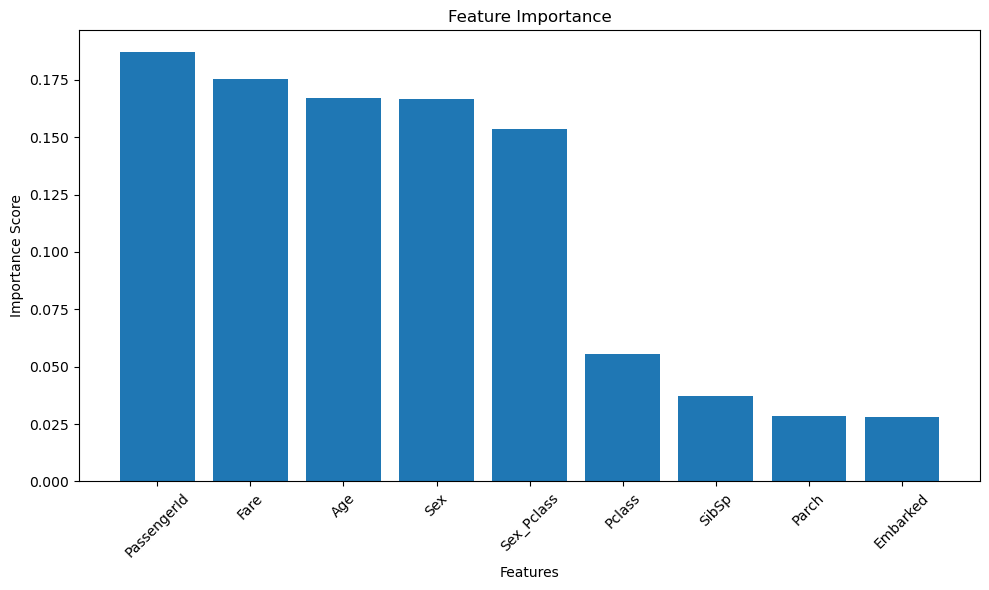

In [136]:

feature_importance = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# A small interface to help predict if a passenger survived or not :)

In [160]:

# 1. PREDICTION FUNCTION 
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    input_data = pd.DataFrame({
        'PassengerId': [999],  # Dummy ID
        'Pclass': [pclass], 
        'Sex': [1 if sex == "Male" else 0],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],      
        'Fare': [fare],
        'Embarked': [embarked],
        'Sex_Pclass': [f"{1 if sex == 'Male' else 0}_{pclass}"] 
    })
    
    print("Input features being sent to model:")
    print(input_data.columns.tolist())
    
    try:
        prediction = model.predict(input_data)[0]
        proba = model.predict_proba(input_data)[0][1] * 100
        with output_area:
            output_area.clear_output()
            print(f"Survival probability: {proba:.1f}%")
            print("Survived :)" if prediction == 1 else "Did not survive :(")
    except Exception as e:
        with output_area:
            output_area.clear_output()
            print(f"⚠️ Error: {str(e)}")
            print("Check if your model expects these features:")
            print(input_data.columns.tolist())

# 2. WIDGETS 
pclass = widgets.Dropdown(options=[1, 2, 3], value=3, description='Ticket class:')
sex = widgets.Dropdown(options=["Female", "Male"], value="Male", description='Sex:')
age = widgets.FloatSlider(min=0, max=80, value=30, step=0.5, description='Age:')
sibsp = widgets.IntSlider(min=0, max=8, value=0, description='# of siblings:')
parch = widgets.IntSlider(min=0, max=6, value=0, description='# of parents/children:')
fare = widgets.FloatSlider(min=0, max=300, value=7.83, step=0.01, description='Fare:')
embarked = widgets.Dropdown(options=[1, 2], value=1, description='Embarked:')

predict_button = widgets.Button(description="PREDICT", 
                                style={'button_color': '#3498db'},
                              layout=widgets.Layout(width='200px', height='40px'))
output_area = widgets.Output(layout={'border': '1px solid blue'})

# 3. CLICK HANDLER WITH ERROR CHECKING
def on_predict_click(b):
    # First verify the model exists
    try:
        if 'model' not in globals():
            raise NameError("No 'model' found - train your model first!")
        
        predict_survival(
            pclass.value,
            sex.value,
            age.value,
            sibsp.value,
            parch.value,
            fare.value,
            embarked.value
        )
    except Exception as e:
        with output_area:
            output_area.clear_output()
            print(f" CRITICAL ERROR: {str(e)}")
            print("1. Have you trained your model?")
            print("2. Does it expect these features?")
            print("['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex_Pclass']")

predict_button.on_click(on_predict_click)

# 4. DISPLAY 
display(widgets.VBox([
    widgets.Label("🎯 TITANIC SURVIVAL PREDICTOR"),
    widgets.HTML("<i>Adjust values then click PREDICT</i>"),
    widgets.GridBox(
        children=[pclass, sex, age, sibsp, parch, fare, embarked],
        layout=widgets.Layout(
            grid_template_columns="repeat(2, 300px)",
            grid_gap="10px"
        )
    ),
    widgets.HBox([predict_button], layout=widgets.Layout(justify_content='center')),
    output_area
]))

In [161]:
I had fun building this and see it a stepping stone in my data science journey!

<hr style="border:1px solid gray">

<p style="text-align: center; color: gray; font-size: 0.9em;">
© 2025 Mekolle Ashley. All Rights Reserved.<br>
Contact: <a href="mailto:mekolleashleyam@gmail.com">mekolleashleyam@gmail.com</a>
</p>

SyntaxError: invalid character '©' (U+00A9) (765508011.py, line 6)